In [8]:
# Inisialisasi Library
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import colorconv
from skimage.io import imread, imshow
from skimage.color import rgb2gray, rgb2hsv
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
import cv2
from math import *

# img = imread('vari1.jpg')
img = cv2.imread('vari1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# imgHSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# img = cv2.resize(img, (640,480))


region = 2
startAreaX = np.zeros(region, dtype='int')
endAreaX = np.zeros(region, dtype='int')
startAreaY = np.zeros(region, dtype='int')
endAreaY = np.zeros(region, dtype='int')

startAreaX[0] = 0
startAreaX[1] = int(img.shape[1]/2)  
endAreaX[0] = int(img.shape[1]/2)+1
endAreaX[1] = img.shape[1]

startAreaY[0] = 0
startAreaY[1] = 0  
endAreaY[0] = img.shape[0]
endAreaY[1] = img.shape[0]

bestWindowX = np.zeros((region, 2),dtype='int')
bestWindowY = np.zeros((region, 2),dtype='int')

# for x in range(region):
#     endAreaX[x] = img.shape[1]*(x/)
#     startAreaX[x] = (img.shape[1]/2)*x

# membuat fungsi untuk plotting dimensi partikel
def dimensi_partikel(ax, nilaiX, nilaiY, ukuranX, ukuranY, edgeColor,facecolor='none'):
    # startX = abs(nilaiX-(1/2*ukuranX)).astype(int)
    # startY = abs(nilaiY-(1/2*ukuranY)).astype(int)

    # mengatur posisi dan dimensi tiap-tiap partikel dengan looping
    kotak_dimensi = [Rectangle((x, y), panjangX, panjangY)
                  for x, y, panjangX, panjangY in zip(nilaiX, nilaiY, ukuranX, ukuranY)]

    pc = PatchCollection(kotak_dimensi, facecolor=facecolor,
                         edgecolor=edgeColor)

    ax.add_collection(pc)

# def fitSum(x,y,gambar, endAX, endAY, startAX, startAY):
#     # print([x,y])

#     x[(x-(endAX)).astype(int) >= 0] = (x[(x-(endAX)).astype(int) >= 0]-((x[(x-(endAX)).astype(int) >= 0]-(endAX)).astype(int))).astype(int)
#     y[(y-(endAY)).astype(int) >= 0] = (y[(y-(endAY)).astype(int) >= 0]-((y[(y-(endAY)).astype(int) >= 0]-(endAY)).astype(int))).astype(int)
    
#     x[(x-(startAX)).astype(int) < 0] = startAX
#     y[(y-(startAY)).astype(int) < 0] = startAY
    
#     startX = abs(x-(1/2*windowX)).astype(int)
#     startY = abs(y-(1/2*windowY)).astype(int)

#     startX[(x-(1/2*windowX)).astype(int) <= 0] = 0
#     startY[(y-(1/2*windowY)).astype(int) <= 0] = 0
#     # print(x[(x-(gambar.shape[1])).astype(int) > 0] ,y[(y-(gambar.shape[0])).astype(int) > 0])

#     endY = abs(startY + windowY).astype(int)#titik ujung y window
#     endX = abs(startX + windowX).astype(int) #titik ujung x window

#     if x[(x-(1/2*windowX)).astype(int) <= 0].all():
#         # print(x[(x-(1/2*windowX)).astype(int) <= 0])
#         x[(x-(1/2*windowX)).astype(int) <= 0] = abs(endX[(x-(1/2*windowX)).astype(int) <= 0]/2) 
#         # print(f'{x[(x-(1/2*windowX)).astype(int) <= 0]}\n')
#     if y[(y-(1/2*windowY)).astype(int) <= 0].all():
#         # print(y[(y-(1/2*windowY)).astype(int) <= 0])  
#         y[(y-(1/2*windowY)).astype(int) <= 0] = abs(endY[(y-(1/2*windowY)).astype(int) <= 0]/2) 
#         # print(y[(y-(1/2*windowY)).astype(int) <= 0])

#     position_update = np.array([x,y], dtype='int32')
#     start_position_update = np.array([startX,startY], dtype='int32')

#     def cvtHsv(image):    
#         # arr = colorconv._prepare_colorarray(image, channel_axis=-1)
#         arr = image/255.
#         out = np.empty_like(arr) #membuat array dengan dimensi array gambar
#         out1 = np.empty_like(arr) #membuat array dengan dimensi array gambar
#         out2 = np.empty_like(arr) #membuat array dengan dimensi array gambar
#         out3 = np.empty_like(arr) #membuat array dengan dimensi array gambar
                
#         value = arr.max(-1)

#         delta = arr.ptp(-1)
#         old_settings = np.seterr(invalid='ignore')
#         saturation = delta/value
#         saturation[delta==0.] = 0.

#         # ambil red saja
#         idx = (arr[...,0] == value)
#         out[idx, 0] = ((((arr[idx,1]-arr[idx,2])/delta[idx])/6.)%1)*60
#         out[idx==False] = 0

#         # green is max
#         idx = (arr[..., 1] == value)# cek index yang memiliki nilai green max
#         out[idx, 0] = (2. + (arr[idx, 2] - arr[idx, 0]) / delta[idx])*60# jika nilai green max maka atur derajat pada index yang nilai green-nya max

#         # blue is max
#         idx = (arr[..., 2] == value)# cek index yang memiliki nilai blue max
#         out[idx, 0] = (4. + (arr[idx, 0] - arr[idx, 1]) / delta[idx])*60# jika nilai blue max maka atur derajat pada index yang nilai blue-nya max
#         hue = (out[...,0])

#         hue[delta==0.] = 0.

#         np.seterr(**old_settings)

#         # array threshold for masking
#         mostRedUpper = [8,100,75]
#         mostRedLower = [0,75, 50]

#         # array threshold for mxasking
#         almostRedUpper = [10,100,90]
#         almostRedLower = [4,75, 70]

#         # array threshold for masking
#         mostGreenUpper = [75,100,100]
#         mostGreenLower = [100,75, 50]

#         # array threshold for masking
#         almostGreenUpper = [60,100,100]
#         almostGreenLower = [85,75, 70]

#         out[...,0] = hue
#         out[...,1] = saturation*100
#         out[...,2] = value*100

#         out1[...,0] = hue
#         out1[...,1] = saturation*100
#         out1[...,2] = value*100

#         out2[...,0] = hue
#         out2[...,1] = saturation*100
#         out2[...,2] = value*100

#         out3[...,0] = hue
#         out3[...,1] = saturation*100
#         out3[...,2] = value*100
 
#         # fig, ax = plt.subplots(3,2,figsize=(10,10))
#         # ax[0,0].hist(hue.flatten(),100, [0,100],color='r')
#         # ax[0,0].set_title('Hue')
#         # ax[1,0].hist(out[...,1].flatten(),100, [0,100],color='g')
#         # ax[1,0].set_title('Saturation')
#         # ax[2,0].hist(out[...,2].flatten(),100, [0,100],color='b')
#         # ax[2,0].set_title('Value')
#         # ax[0,1].imshow(image)
#         # ax[1,1].imshow(image)
#         # ax[2,1].imshow(image)
        
#         indexMostRed = (out < mostRedUpper)*(out >= mostRedLower)
#         out[indexMostRed == True] = 1
#         out[indexMostRed == False] = 0
#         mostRed = np.sum(out[...,0].flatten()*out[..., 1].flatten()*out[..., 2].flatten())
        
#         indexAlmostRed =np.sum (out1 < almostRedUpper)*(out1 >= almostRedLower)
#         out[indexAlmostRed == True] = 1
#         out[indexAlmostRed == False] = 0
#         almostRed = np.sum(out1[...,0].flatten()*out1[..., 1].flatten()*out1[..., 2].flatten())
        
#         indexMostGreen = (out2 < mostGreenUpper)*(out2 >= mostGreenLower)
#         out[indexMostGreen == True] = 1
#         out[indexMostGreen == False] = 0
#         mostGreen = np.sum(out2[...,0].flatten()*out2[..., 1].flatten()*out2[..., 2].flatten())
        
#         fitnes = (1.5*mostRed) + almostRed - mostGreen

#         # fig, ax = plt.subplots(figsize=(3,3))
#         # ax.imshow(image)
#         # ax.set_title(fitnes)
#         # print(fitnes)
#         return fitnes
#     result = np.array([cvtHsv(gambar[startY[i]:endY[i], startX[i]:endX[i]]) for i in range(x.shape[0])])
#     resultInt = result.astype(int)
#     return result, position_update, start_position_update

# def fitSum(x,y,gambar, endAX, endAY, startAX, startAY):
#     # print([x,y])

#     x[(x-(endAX)).astype(int) >= 0] = (x[(x-(endAX)).astype(int) >= 0]-((x[(x-(endAX)).astype(int) >= 0]-(endAX)).astype(int))).astype(int)
#     y[(y-(endAY)).astype(int) >= 0] = (y[(y-(endAY)).astype(int) >= 0]-((y[(y-(endAY)).astype(int) >= 0]-(endAY)).astype(int))).astype(int)
    
#     x[(x-(startAX)).astype(int) < 0] = startAX
#     y[(y-(startAY)).astype(int) < 0] = startAY
    
#     startX = abs(x-(1/2*windowX)).astype(int)
#     startY = abs(y-(1/2*windowY)).astype(int)

#     startX[(x-(1/2*windowX)).astype(int) <= 0] = 0
#     startY[(y-(1/2*windowY)).astype(int) <= 0] = 0
#     # print(x[(x-(gambar.shape[1])).astype(int) > 0] ,y[(y-(gambar.shape[0])).astype(int) > 0])

#     endY = abs(startY + windowY).astype(int)#titik ujung y window
#     endX = abs(startX + windowX).astype(int) #titik ujung x window

#     if x[(x-(1/2*windowX)).astype(int) <= 0].all():
#         # print(x[(x-(1/2*windowX)).astype(int) <= 0])
#         x[(x-(1/2*windowX)).astype(int) <= 0] = abs(endX[(x-(1/2*windowX)).astype(int) <= 0]/2) 
#         # print(f'{x[(x-(1/2*windowX)).astype(int) <= 0]}\n')
#     if y[(y-(1/2*windowY)).astype(int) <= 0].all():
#         # print(y[(y-(1/2*windowY)).astype(int) <= 0])  
#         y[(y-(1/2*windowY)).astype(int) <= 0] = abs(endY[(y-(1/2*windowY)).astype(int) <= 0]/2) 
#         # print(y[(y-(1/2*windowY)).astype(int) <= 0])

#     position_update = np.array([x,y], dtype='int32')
#     start_position_update = np.array([startX,startY], dtype='int32')

#     def cvtHsv(image):    
#         imageHSV = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
#         H = imageHSV[:,:,0]
#         S = imageHSV[:,:,1]
#         V = imageHSV[:,:,2]

#         lower1 = np.array([0,100,150])
#         upper1 = np.array([10,185,255])
#         lower2 = np.array([160,100,150])
#         upper2 = np.array([179,185,255])
        
#         upper_mask = cv2.inRange(imageHSV, lower2, upper2)
#         lower_mask = cv2.inRange(imageHSV, lower1, upper1)

#         mostRed = np.sum(upper_mask+lower_mask)

#         almostlower1 = np.array([0,150,100])
#         almostupper1 = np.array([10,255,185])
#         almostlower2 = np.array([160,150,100])
#         almostupper2 = np.array([179,255,185])

#         almostLower = cv2.inRange(imageHSV, almostlower1, almostupper1)
#         almostUpper = cv2.inRange(imageHSV, almostlower2, almostupper2)

#         almostRed = np.sum(almostLower+almostUpper)

#         greenLow = np.array([25,50,100])
#         greenUp = np.array([75,255,255])


#         mostGreen = np.sum(cv2.inRange(imageHSV, greenLow, greenUp))
        
#         fitnes = (2*mostRed) + almostRed - mostGreen

#         # fig, ax = plt.subplots(figsize=(3,3))
#         # ax.imshow(image)
#         # ax.set_title(fitnes)
#         # print(fitnes)
#         return fitnes
#     result = np.array([cvtHsv(gambar[startY[i]:endY[i], startX[i]:endX[i]]) for i in range(x.shape[0])])
#     resultInt = result.astype(int)
#     return result, position_update, start_position_update


def fitSumCV2(x,y,gambar):
    # print([x,y])

    # x[(x-(endAX)).astype(int) >= 0] = (x[(x-(endAX)).astype(int) >= 0]-((x[(x-(endAX)).astype(int) >= 0]-(endAX)).astype(int))).astype(int)
    # y[(y-(endAY)).astype(int) >= 0] = (y[(y-(endAY)).astype(int) >= 0]-((y[(y-(endAY)).astype(int) >= 0]-(endAY)).astype(int))).astype(int)
    
    # x[(x-(startAX)).astype(int) < 0] = startAX
    # y[(y-(startAY)).astype(int) < 0] = startAY
    
    startX = abs(x-(1/2*windowX)).astype(int)
    startY = abs(y-(1/2*windowY)).astype(int)

    startX[(x-(1/2*windowX)).astype(int) <= 0] = 0
    startY[(y-(1/2*windowY)).astype(int) <= 0] = 0
    # print(x[(x-(gambar.shape[1])).astype(int) > 0] ,y[(y-(gambar.shape[0])).astype(int) > 0])

    endY = abs(startY + windowY).astype(int)#titik ujung y window
    endX = abs(startX + windowX).astype(int) #titik ujung x window

    if x[(x-(1/2*windowX)).astype(int) <= 0].all():
        # print(x[(x-(1/2*windowX)).astype(int) <= 0])
        x[(x-(1/2*windowX)).astype(int) <= 0] = abs(endX[(x-(1/2*windowX)).astype(int) <= 0]/2) 
        # print(f'{x[(x-(1/2*windowX)).astype(int) <= 0]}\n')
    if y[(y-(1/2*windowY)).astype(int) <= 0].all():
        # print(y[(y-(1/2*windowY)).astype(int) <= 0])  
        y[(y-(1/2*windowY)).astype(int) <= 0] = abs(endY[(y-(1/2*windowY)).astype(int) <= 0]/2) 
        # print(y[(y-(1/2*windowY)).astype(int) <= 0])

    position_update = np.array([x,y], dtype='int32')
    start_position_update = np.array([startX,startY], dtype='int32')

    def cvtHsv(image):    
        
        imageHSV = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
        H = imageHSV[:,:,0]
        S = imageHSV[:,:,1]
        V = imageHSV[:,:,2]

        # imageRGB = cv2.cvtColor(imageBGR,cv2.COLOR_BGR2RGB)

        fig, ax = plt.subplots(3,2,figsize=(10,10))
        ax[0,0].hist(H.flatten(),180, [0,180],color='r')
        ax[0,0].set_title(f'Hue, {int(np.mean(H.flatten()))}')
        ax[1,0].hist(S.flatten(),255, [0,255],color='g')
        ax[1,0].set_title(f'Saturation, {int(np.mean(S.flatten()))}')
        ax[2,0].hist(V.flatten(),255, [0,255],color='b')
        ax[2,0].set_title(f'Value, {int(np.mean(S.flatten()))}')
        ax[0,1].imshow(image)
        ax[1,1].imshow(image)
        ax[2,1].imshow(image)

        lower1 = np.array([0,100,150])
        upper1 = np.array([10,185,255])
        lower2 = np.array([160,100,150])
        upper2 = np.array([179,185,255])
        
        upper_mask = cv2.inRange(imageHSV, lower2, upper2)
        lower_mask = cv2.inRange(imageHSV, lower1, upper1)

        mostRed = np.sum(upper_mask+lower_mask)

        almostlower1 = np.array([0,150,100])
        almostupper1 = np.array([10,255,185])
        almostlower2 = np.array([160,150,100])
        almostupper2 = np.array([179,255,185])

        almostLower = cv2.inRange(imageHSV, almostlower1, almostupper1)
        almostUpper = cv2.inRange(imageHSV, almostlower2, almostupper2)

        almostRed = np.sum(almostLower+almostUpper)

        greenLow = np.array([25,50,100])
        greenUp = np.array([75,255,255])


        mostGreen = np.sum(cv2.inRange(imageHSV, greenLow, greenUp))
        
        fitnes = (1.5*mostRed) + almostRed - mostGreen

        fig, ax = plt.subplots(figsize=(3,3))
        ax.imshow(image)
        ax.set_title(fitnes)
        print(fitnes)
        return fitnes
    result = np.array([cvtHsv(gambar[startY[i]:endY[i], startX[i]:endX[i]]) for i in range(5)])
    # resultInt = result.astype(int)
    return result, position_update, start_position_update


In [9]:
# lower1 = np.array([0,100,100])
# upper1 = np.array([10,255,255])
# lower2 = np.array([160,100,100])
# upper2 = np.array([179,255,255])

# greenLow = np.array([25,50,100])
# greenUp = np.array([75,255,255])

# upper_mask = cv2.inRange(imgHSV, lower2, upper2)
# lower_mask = cv2.inRange(imgHSV, lower1, upper1)

# green_mask = cv2.inRange(imgHSV, greenLow, greenUp)

# full_mask = upper_mask + lower_mask

# result = cv2.bitwise_and(imgRGB, imgRGB, mask=full_mask)
# resultGreen = cv2.bitwise_and(imgRGB, imgRGB, mask=green_mask)
# # print(np.sum(upper_mask))

# fig, ax = plt.subplots(1,3,figsize=(5,5))
# ax[0].imshow(result)
# ax[1].imshow(resultGreen)
# ax[2].imshow(imgRGB)

2714475.0
-35720910.0
-23111415.0
-28835910.0
-25004025.0
2714475.0
11030790.0
-563677.5
13910122.5
8791635.0


C:\Users\Maliki\AppData\Local\Temp\ipykernel_15176\989927904.py:343: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(3,3))


IndexError: boolean index did not match indexed array along dimension 1; dimension is 10 but corresponding boolean dimension is 5

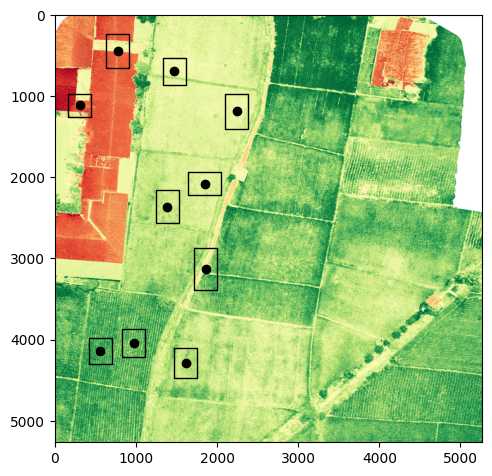

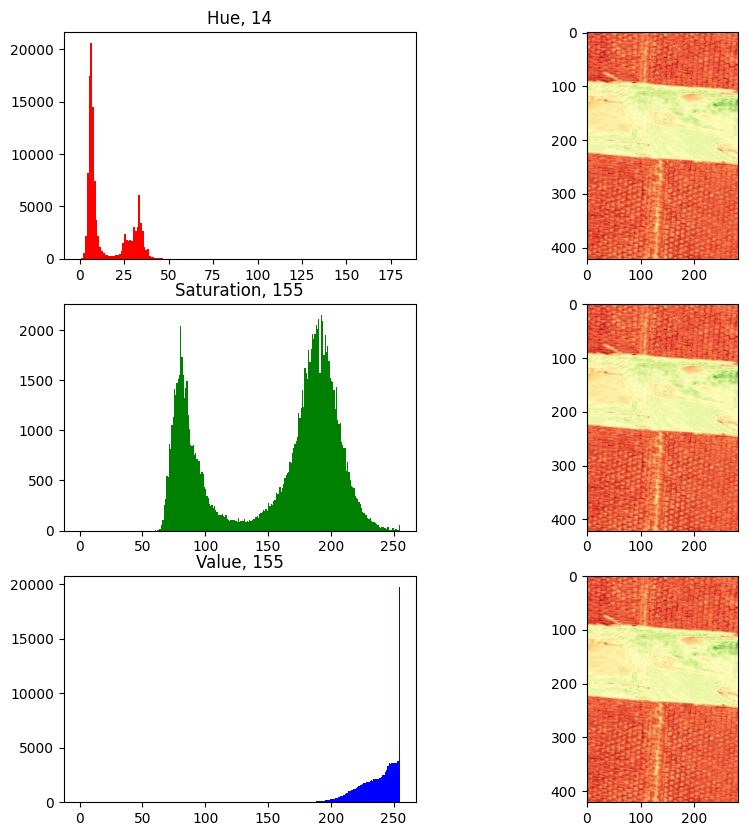

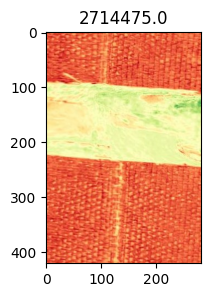

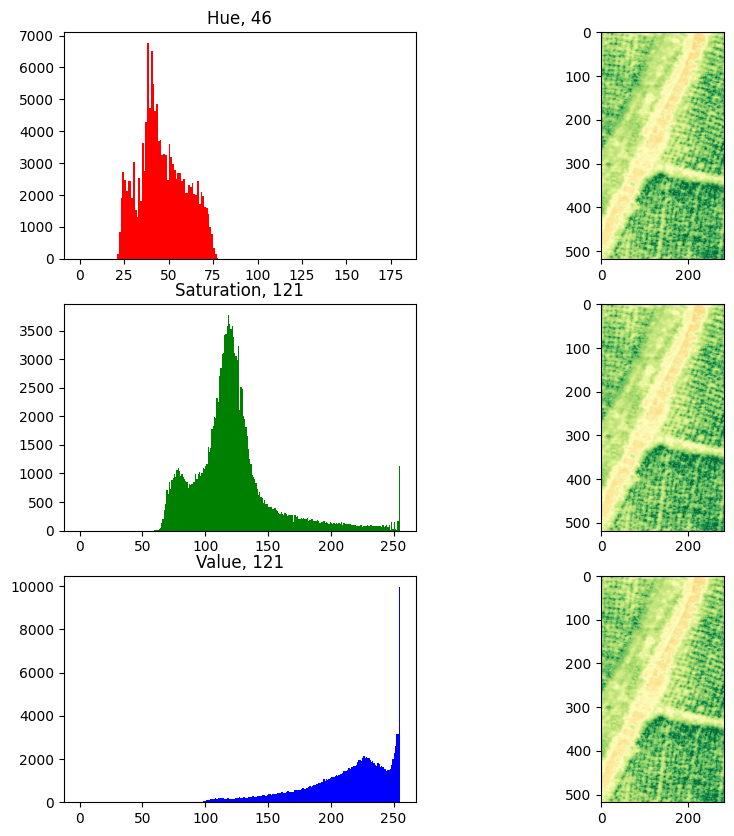

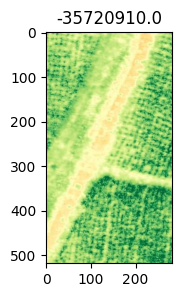

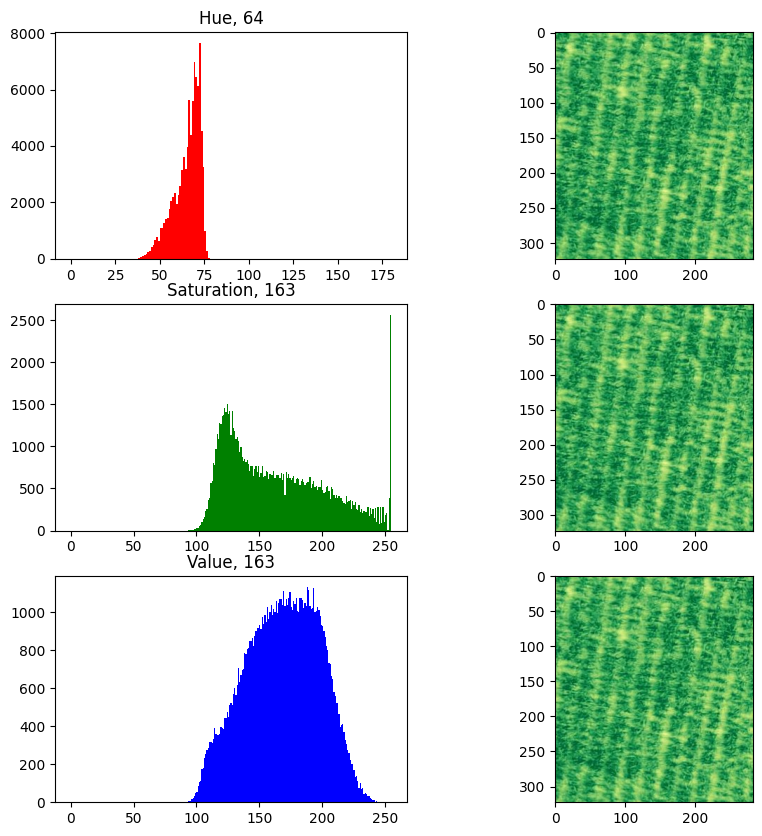

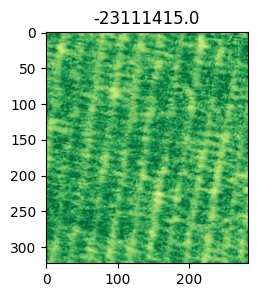

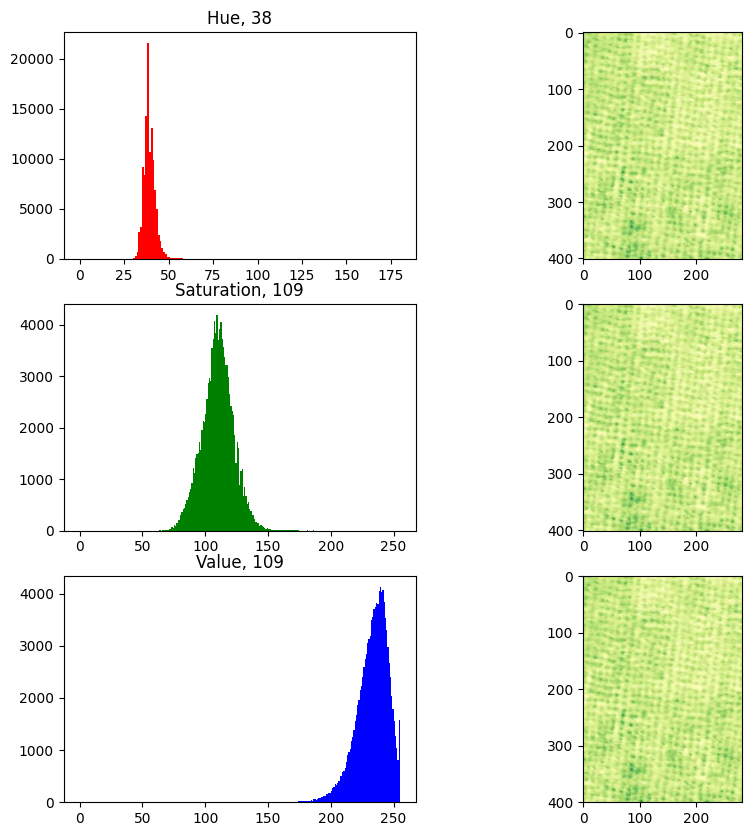

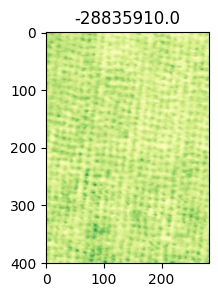

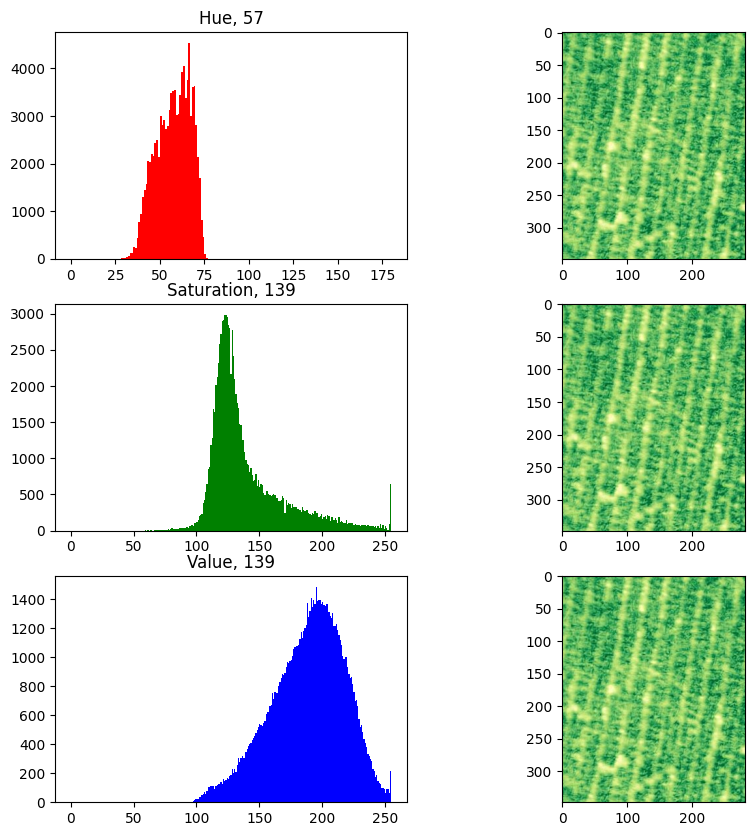

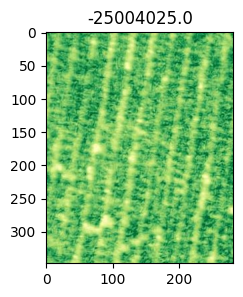

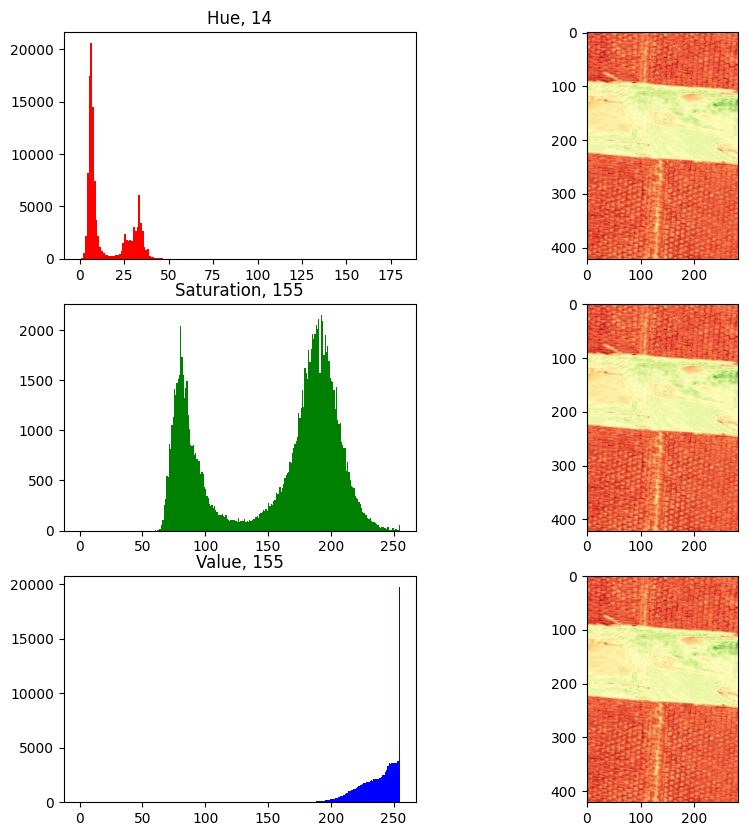

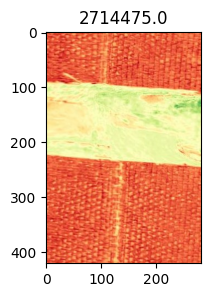

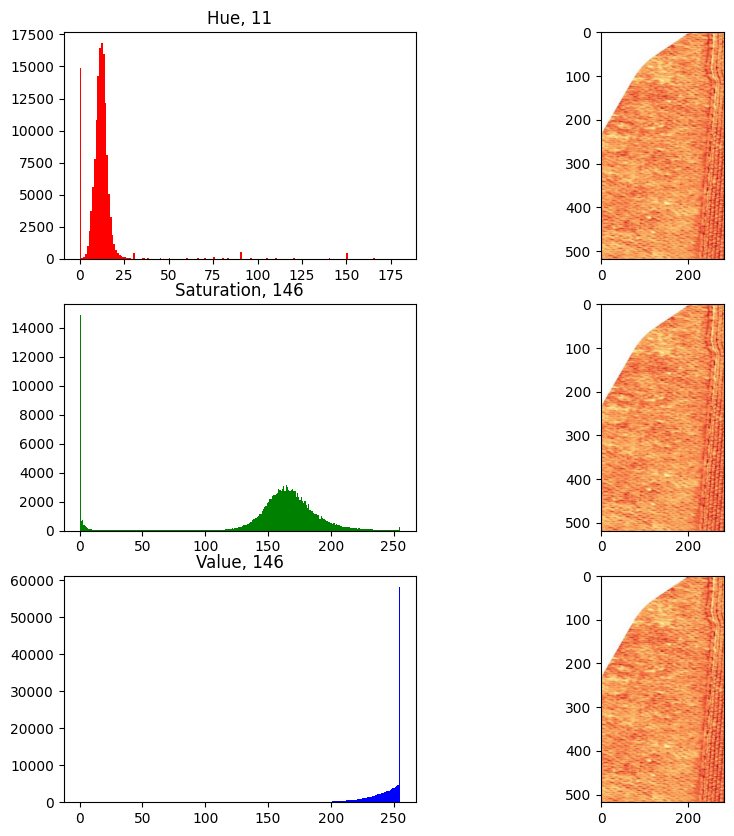

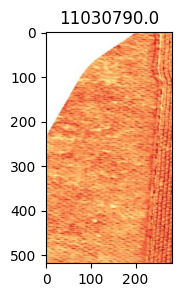

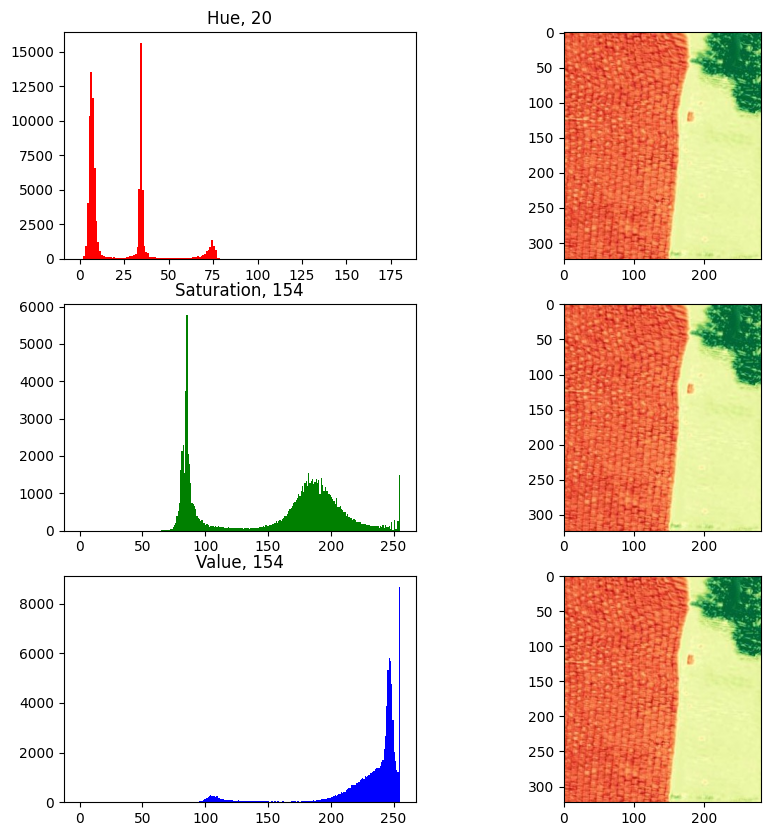

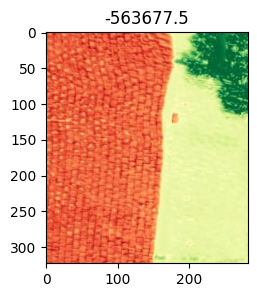

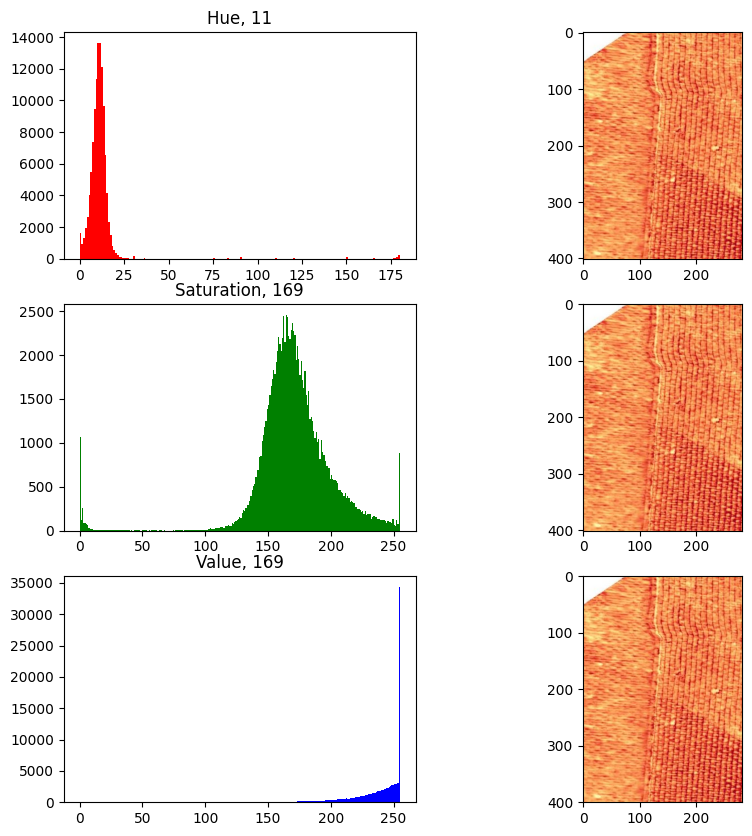

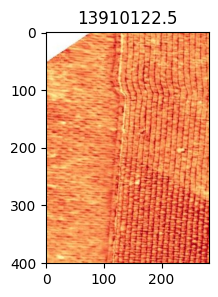

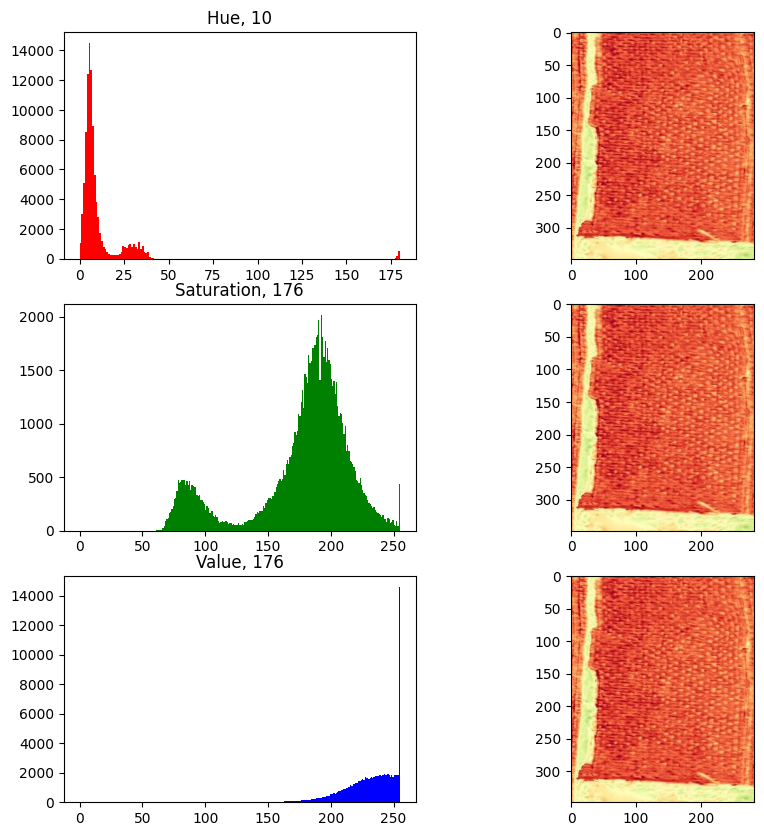

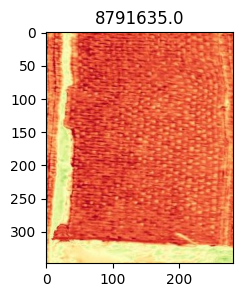

In [10]:
for m in range(1):
    partikel = 10
    dimensi = 2 

    c1 = 2
    c2 = 2
    w = 0.5
    n = 20

    gbest = np.zeros((region,n,dimensi), dtype='int32')
    gbest_val = np.zeros((region,n), dtype='int32')

    for i in range(region):
    # konversi ke integer
        x_pos = np.zeros((dimensi, partikel), dtype='int32')
        x = np.random.randint(startAreaX[i],int(endAreaX[i]),(partikel), dtype='int32')
        y = np.random.randint(startAreaY[i],int(endAreaY[i]),(partikel), dtype='int32')

        x_pos[0] = x
        x_pos[1] = y
        
        # membuat ukuran dimensi partikel
        size = np.mean(img.shape)/25
        rand_size = np.random.rand(partikel)

        # ukuran window random awal
        ukuran_partikel = ((rand_size+size)*2).astype(int)

        # array untuk window
        windowX = np.zeros((partikel))
        windowY = np.zeros((partikel))

        # generate nilai window dengan random
        for k in range(partikel):
            if rand_size[k] < .5:
                windowX[k] = (1 + np.random.rand(1))*ukuran_partikel[k]
                windowY[k] = ukuran_partikel[k]
            else:
                windowX[k] = ukuran_partikel[k]
                windowY[k] = (1 + np.random.rand(1))*ukuran_partikel[k]

        # merubah window jadi bentuk integer
        windowY = windowY.astype(int)
        windowX = windowX.astype(int)

        startX = abs(x_pos[0]-(1/2*windowX)).astype(int)
        startY = abs(x_pos[1]-(1/2*windowY)).astype(int)

        startX[(x_pos[0]-(1/2*windowX)).astype(int) <= startAreaX[i]] = startAreaX[i]
        startY[(x_pos[1]-(1/2*windowY)).astype(int) <= startAreaY[i]] = startAreaY[i]

        endY = abs(startY + windowY).astype(int)#titik ujung y window
        endX = abs(startX + windowX).astype(int) #titik ujung x window

        fig, ax = plt.subplots(figsize=(5,5))
        fig.tight_layout()
        ax.plot(x, y, 'o', color='black')
        # for x, y in zip(x1, y1):
        #     ax.text(x, y, (str(x), str(y)), color="black", fontsize=8)
        # for x, y in zip(x2, y2):
        #     ax.text(x, y, (str(x), str(y)), color="black", fontsize=8)
        ax.imshow(img)
        dimensi_partikel(ax, startX, startY, windowX, windowY, edgeColor='black')

        # plt.show()

        # inisialisasi kecepatan pastikel secara random
        v = np.random.rand(dimensi,partikel)

        # distance 
        distance = np.zeros(n, dtype='int')

        # nilai pbest
        # pbest = np.zeros((dimensi,partikel), dtype='int32')
        startPos = np.zeros((dimensi,partikel), dtype='int32')
        # pbest_val = np.zeros((partikel))
        # nilai gbest
        pbest_val, x_pos, startPos = fitSumCV2(x, y, img)
        pbest = x_pos # posisi pbest awal


        # temukan index di mana nilai optima ada pada pbest
        index = pbest_val.argmax()

        # isi gbest dengan nilai posisi partike, dan gbest val untuk nilai fitness pada partikel spesifik
        gbest[i,0] = pbest[:,index]
        gbest_val[i,0] = pbest_val.max()
        

        for j in range(1,n):
        # atur nilai random
            r1 = np.random.rand()
            r2 = np.random.rand()
            
            # atur nilai kecepatan dan posisi
            v = w + v + (c1*r1*(pbest-x_pos))+(c2*r2*(gbest[i,j-1].reshape(-1,1)-x_pos))
            x_pos = (x_pos+v)
            x_pos = x_pos.astype(int)
            x_pos[x_pos<0] = x_pos[x_pos<0] + abs(x_pos[x_pos<0])

            # print(f'xpos {x_pos[0,index]}')

            x_int = x_pos[0]
            y_int = x_pos[1]

            # masukkan nilai pbest baru
            fitness, x_pos, startPos = fitSumCV2(x_int, y_int, img)
            # print(fitness,x_pos,startPos)

            pbest[:,(pbest_val > fitness)] = pbest[:,(pbest_val > fitness)]
            pbest[:,(fitness > pbest_val)] = x_pos[:,(fitness > pbest_val)]
            
            pbest_val = np.array([pbest_val, fitness]).max(axis=0)
            # set index nilai terbesar
            index = pbest_val.argmax()

            # atur nilai gbest agar tetap jika pbest value tidak berubah

            # set gbest baru
            gbest[i,j] = pbest[...,index]
            gbest_val[i,j] = pbest_val.max()
            # if j%4==0:
            #     fig, ax = plt.subplots(figsize=(5,5))
            #     fig.tight_layout()
            #     ax.imshow(img)
            #     ax.plot(x_pos[0], x_pos[1], 'o', color='black')
            #     ax.set_title(f't = {j}, optima {gbest_val[i,j]}, \ngbest {gbest[i,j]}')
            #     dimensi_partikel(ax, startPos[0], startPos[1], windowX, windowY, edgeColor='black')
                # ax[1].set_title(f'Fitness Value = {gbest_val[i]}')
                # barplot = ax[1].bar(range(partikel), pbest_val/10000)
                # ax[1].bar_label(barplot, labels=pbest_val/10000, label_type='edge')
                # ax[1].imshow(imgArray[0])
                # ax[1].plot(gbest[j,0], gbest[j,1], 'o', color='black')
    fig, ax = plt.subplots(figsize=(5,5))
    ax.imshow(img)
    ax.plot(gbest[:,4,0], gbest[:,4,1], 'o', color='black')\
    

In [11]:
windowX, windowY

(array([282, 282, 282, 282, 282, 404, 282, 282, 282, 282]),
 array([421, 518, 323, 401, 348, 281, 429, 376, 341, 287]))

In [ ]:
# fig, ax = plt.subplots(figsize=(10,10))
# ax.imshow(img)
# ax.plot(gbest[:,4,0], gbest[:,4,1], 'o', color='black')


# dimensi_partikel(ax, bestWindowX[:,0], bestWindowY[:,0], bestWindowX[:,1], bestWindowY[:,1], edgeColor='black')